# Assignment 5 & 6: Charts
#### Joshua Greenert
#### DSC640-T301 Data Presentation and Visualization
#### 1/12/2023

In [10]:
# Import the required libaries for plotting.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set the dataframe and confirm the records are present.
df_unemployment = pd.read_csv('unemployement-rate-1948-2010.csv')

df_unemployment.head(5)

,Series id,Year,Period,Value
0,LNS14000000,1948,M01,3.4
1,LNS14000000,1948,M02,3.8
2,LNS14000000,1948,M03,4.0
3,LNS14000000,1948,M04,3.9
4,LNS14000000,1948,M05,3.5


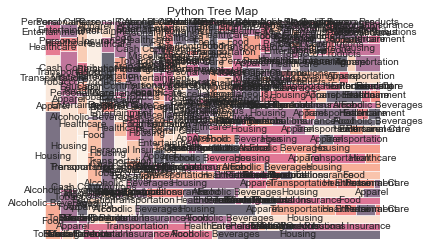

In [8]:
# Python Tree Map
import squarify

# Set the style for seaborn.
sns.set_style(style="whitegrid")

# Set the sizes and labels.
sizes = df_unemployment["expenditure"]
label = df_unemployment["category"]

# Plot the data.
squarify.plot(sizes=sizes, label=label, alpha=0.6).set(title='Python Tree Map')
plt.axis('off')
plt.show()

In [5]:
# Python Area Chart

In [ ]:
# Python Stacked Area Chart